In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
path = '/Users/redabelhaj/Desktop/INF473V/Projet/scaling_results/scaling.xlsx'

In [10]:
ds = pd.read_excel(path, sheet_name = ['w_new', 'r_new', 'd_new', 'basline', 'c_new'], header=None)

In [11]:
w_new, r_new, d_new, base, c_new = ds['w_new'], ds['r_new'], ds['d_new'], ds['basline'], ds['c_new']

In [60]:
w_moy = np.mean(w_new).to_numpy()
d_moy = np.mean(d_new).to_numpy()
r_moy = np.mean(r_new).to_numpy()
c_moy = np.mean(c_new).to_numpy()
base_moy = np.mean(base).to_numpy()

In [51]:
flops = [1, 1.33, 1.66, 2, 3]


In [52]:
## un plotsans error-bars

In [62]:
c_moy= c_moy[~pd.isnull(c_moy)]

In [64]:
w_moy_f = np.concatenate([base_moy, w_moy])
d_moy_f = np.concatenate([base_moy, d_moy])
r_moy_f = np.concatenate([base_moy, r_moy])
c_moy_f = np.concatenate([base_moy, c_moy])

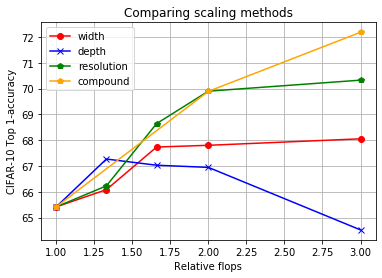

In [67]:
plt.plot(flops, w_moy_f, marker = 'o', color = 'r', label='width')
plt.plot(flops, d_moy_f, marker = 'x', color = 'b', label='depth')
plt.plot(flops, r_moy_f, marker = 'p', color = 'g', label='resolution')
plt.plot([1,2,3], c_moy_f, marker = 'p', color = 'orange', label='compound')

plt.xlabel('Relative flops')
plt.ylabel('CIFAR-10 Top 1-accuracy')
plt.legend()
plt.grid()
plt.title('Comparing scaling methods')

plt.show()

In [68]:
## Un plot avec erreurs

In [69]:
base_error = np.std(base).to_numpy()

In [70]:
base_error

array([1.03515229])

In [72]:
w_err = np.std(w_new).to_numpy()
d_err = np.std(d_new).to_numpy()
r_err = np.std(r_new).to_numpy()
c_err = np.std(c_new).to_numpy()
c_err2 = c_err[~pd.isnull(c_err)]

w_err_f = np.concatenate([base_error, w_err])
d_err_f = np.concatenate([base_error, d_err])
r_err_f = np.concatenate([base_error, r_err])
c_err_f = np.concatenate([base_error, c_err2])


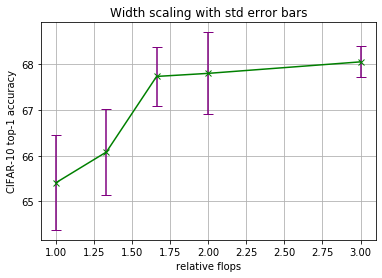

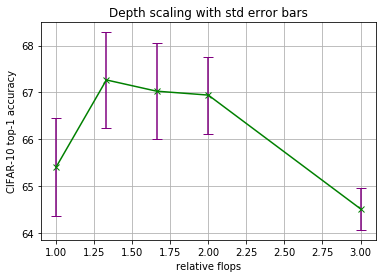

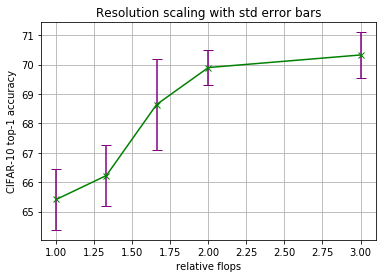

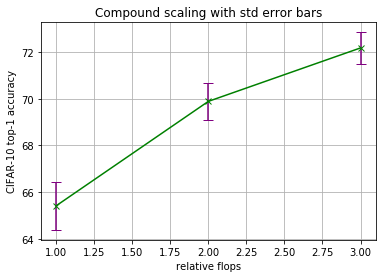

In [73]:
plt.errorbar(flops, w_moy_f,yerr=w_err_f, marker = 'x', color = 'g', ecolor = 'purple', capsize=5)
plt.xlabel('relative flops')
plt.ylabel('CIFAR-10 top-1 accuracy')
plt.title('Width scaling with std error bars')
plt.grid()
plt.show()

plt.errorbar(flops, d_moy_f,yerr=d_err_f, marker = 'x', color = 'g', ecolor = 'purple', capsize=5)
plt.xlabel('relative flops')
plt.ylabel('CIFAR-10 top-1 accuracy')
plt.title('Depth scaling with std error bars')
plt.grid()
plt.show()

plt.errorbar(flops, r_moy_f,yerr=r_err_f, marker = 'x', color = 'g', ecolor = 'purple', capsize=5)
plt.xlabel('relative flops')
plt.ylabel('CIFAR-10 top-1 accuracy')
plt.title('Resolution scaling with std error bars')
plt.grid()
plt.show()

plt.errorbar([1,2,3], c_moy_f,yerr=c_err_f, marker = 'x', color = 'g', ecolor = 'purple', capsize=5)
plt.xlabel('relative flops')
plt.ylabel('CIFAR-10 top-1 accuracy')
plt.title('Compound scaling with std error bars')
plt.grid()
plt.show()
